In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [17]:
song = pd.read_csv('../../data/training_data.csv', na_values='?').dropna()

song.sample(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
513,0.068200,0.798,246360,0.487,0.000000,1,0.0925,-4.939,1,0.2060,151.020,4,0.292,0
361,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
373,0.586000,0.565,238933,0.461,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
303,0.027300,0.653,237813,0.676,0.021500,5,0.1280,-6.318,1,0.0310,125.027,4,0.613,1
478,0.324000,0.561,204333,0.446,0.000000,11,0.1580,-10.237,1,0.0278,114.829,4,0.557,0


In [18]:
attr = ['acousticness','danceability','duration',
        'energy','instrumentalness','key','liveness',
        'loudness','mode','speechiness','tempo',
        'time_signature','valence']
label = 'label'

# the colinearity between different feature by geometric
# pd.plotting.scatter_matrix(song[attr], figsize = (10,10))
# plt.show()

# the colinearity between different feature by numeric
# song[attr].corr()

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(song[attr],
                                                   song[label],
                                                   test_size=0.2,
                                                   random_state=1,
                                                   shuffle=True)

scaler = StandardScaler()
scaler.fit(xtrain)
xtest = scaler.transform(xtest)

logreg = LogisticRegression(solver = 'liblinear',class_weight='balanced')
para = {'C': np.logspace(-3,3,8), 'penalty':['l1','l2']}
logSearch = GridSearchCV(logreg,para,cv=5)
logSearch.fit(xtrain,ytrain)

print('best hyperparameters: ', logSearch.best_params_)
print('accuracy ',logSearch.best_score_)

best hyperparameters:  {'C': 2.6826957952797246, 'penalty': 'l1'}
accuracy  0.7966666666666666


In [20]:
bestLogReg = LogisticRegression(C= logSearch.best_params_['C'],penalty= 'l1',solver = 'liblinear')
bestLogReg.fit(xtrain,ytrain)
pred = bestLogReg.predict(xtest)
print('accuracy', accuracy_score(pred, ytest))
print('f1-score', f1_score(pred, ytest))

accuracy 0.7266666666666667
f1-score 0.7783783783783783


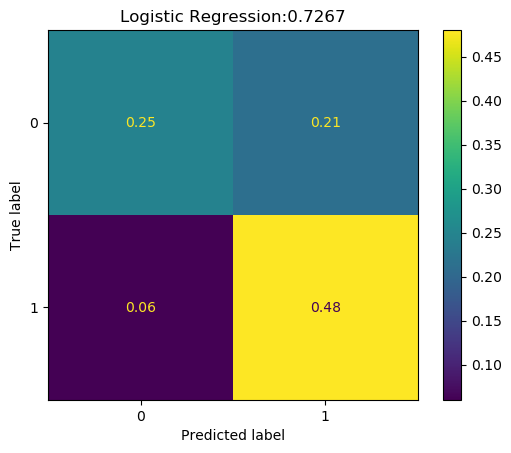

In [24]:
plot_confusion_matrix(bestLogReg, xtest, ytest, normalize = 'all')


plt.title("Logistic Regression:{:.4f}".format(accuracy_score(pred, ytest)))
plt.savefig("../../result/LR")
plt.show()